<a href="https://colab.research.google.com/github/EngRenan/Data-Analysis---Exploratory/blob/main/Analise_Batida_e_Risco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importando Libs necessarias
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Carregando dataset
df = pd.read_excel('/content/Levantamento dos dados.xlsx')

#Extraindo primeiras 5 linhas 
df.head()

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,QM,PN,Descrição PN,Descrição CTO,Grupo Defeito,AC,Emissão QM,CTA,Gerente CTA,Escape Área,...,Quantas peças estocada atualmente?\n(Logística),Item de falta no período?\n(PCP),Tamanho do lote de fabricação\n(PCP),Demanda por avião (ZPP031)\n(PCP),Ciclo planejado\n(PCP),Ciclo real\n(PCP),É caminho crítico do VSM?\n(Produção),PN de internação\n(Qualidade),QTD peça em WIP\n(Qualidade),Houve Scapes no período?
0,200133459,170-70154-005,"HASTE SUPERIOR-HASTE PRINCIPAL, TDPP",Pintura,Batida / Risco,'-,2022-05-09,586,Leandro Sodre - GPD,Não Escape,...,0,80.0,2,230,80,15.468750,Não,Sim,0,NÃO
1,200131495,190-70470-301QB10,"CAME, INFERIOR-PERNA FORCA TDPA",Logística,Batida / Risco,'-,2022-01-24,683,Rafael Alves Matos - GPL,Não Escape,...,3,19.0,4,76,0,0.000000,Não,Não,0,NÃO
2,200132483,170-70262-003,"HASTE SECUNDARIA INF, HASTE SEC TDPP",Logística,Batida / Risco,'-,2022-03-17,683,Rafael Alves Matos - GPL,Não Escape,...,1,11.0,20,261,101,0.000000,Não,Não,0,NÃO
3,200131518,170-70406-403,MUNHÃO CONJUNTO-PERNA FORÇA TDPN,CENTRO TORN. WFL 1 M120,Batida / Risco,8D-7121,2022-01-26,536,Leandro Sodre - GPD,Não Escape,...,0,81.0,1,97,29,23.938182,SIM,Não,17,NÃO
4,200131544,170-70406-403,MUNHÃO CONJUNTO-PERNA FORÇA TDPN,Inspeção DEA,Batida / Risco,8D-7121,2022-01-27,3410,Leandro Sodre - GPD,Escape entre Áreas,...,0,81.0,1,97,29,23.938182,SIM,Não,17,NÃO


In [8]:
# Extraindo ultimas 5 linhas
df.tail()

,QM,PN,Descrição PN,Descrição CTO,Grupo Defeito,AC,Emissão QM,CTA,Gerente CTA,Escape Área,...,Quantas peças estocada atualmente?\n(Logística),Item de falta no período?\n(PCP),Tamanho do lote de fabricação\n(PCP),Demanda por avião (ZPP031)\n(PCP),Ciclo planejado\n(PCP),Ciclo real\n(PCP),É caminho crítico do VSM?\n(Produção),PN de internação\n(Qualidade),QTD peça em WIP\n(Qualidade),Houve Scapes no período?
361,200137596,ZTER-196-32185-035,"PINO DE CIS,MUNHAO-ASA,INOX",Passivação,Batida / Risco,'-,2022-11-24,592,Leandro Sodre - GPD,Não Escape,...,0,23.0,8,0,0,24.574,Não,Não,0,NÃO
362,200134913,ZTER-196-32216-035,"PINO DE CIS,MUNHAO-ASA,INOX",YABORA INDUSTRIA AERONAUTICA SA,Batida / Risco,'-,2022-07-22,592,Leandro Sodre - GPD,Escape entre Áreas,...,0,21.0,0,0,0,19.490,Não,Não,9,NÃO
363,200136881,ZTER-196-32216-035,"PINO DE CIS,MUNHAO-ASA,INOX",Abast. e Transp. Interno de Mat.,Batida / Risco,'-,2022-10-20,592,Leandro Sodre - GPD,Escape entre Áreas,...,0,21.0,0,0,0,19.490,Não,Não,9,NÃO
364,200134046,ZTER-550-15679-001,PARAFUSO-CABECA SEXT.3125-24 UNJF 2A,YABORA INDUSTRIA AERONAUTICA S,Batida / Risco,'-,2022-06-07,592,Leandro Sodre - GPD,Escape entre Áreas,...,0,24.0,0,0,0,18.770,Não,Não,0,NÃO
365,200133850,ZTER-550-15679-001,PARAFUSO-CABECA SEXT.3125-24 UNJF 2A,AJUSTAGEM VALV,Batida / Risco,'-,2022-05-26,592,Leandro Sodre - GPD,Escape entre Áreas,...,0,24.0,0,0,0,18.770,Não,Não,0,NÃO


In [9]:
# Verificando shape
df.shape

(366, 45)

In [10]:
#Verificando tamanho
df.size

16470

In [11]:
total_lines = sum(1 for lines in df)
print(total_lines)

45


In [12]:
#Checando valores nulos
df.isnull().sum()

QM                                                                     0
PN                                                                     0
Descrição PN                                                           0
Descrição CTO                                                          0
Grupo Defeito                                                          0
AC                                                                     0
Emissão QM                                                             0
CTA                                                                    0
Gerente CTA                                                            0
Escape Área                                                            0
Escape CTs                                                             0
Grupo Código Causa                                                     0
Área CTO                                                               0
Área - CTA                                         

In [13]:
# Verificando classes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 45 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   QM                                                                366 non-null    int64         
 1   PN                                                                366 non-null    object        
 2   Descrição PN                                                      366 non-null    object        
 3   Descrição CTO                                                     366 non-null    object        
 4   Grupo Defeito                                                     366 non-null    object        
 5   AC                                                                366 non-null    object        
 6   Emissão QM                                                        366 non-

In [14]:
# Verificando dados estatisticos
df.describe()

,QM,Aging da nota (dias),Material,Quantidade de operações do roteiro\n(Manufatura),Quanto tempo em estoque (dias),Item de falta no período?\n(PCP),Tamanho do lote de fabricação\n(PCP),Demanda por avião (ZPP031)\n(PCP),Ciclo planejado\n(PCP),Ciclo real\n(PCP),QTD peça em WIP\n(Qualidade)
count,3.660000e+02,366.000000,3.660000e+02,366.000000,0.0,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.001346e+08,46.409836,9.080442e+06,10.726776,NaN,83.712329,2.846995,112.978142,52.087432,36.785923,25.180328
std,1.851340e+03,59.677088,2.160897e+06,9.678486,NaN,72.318146,8.637198,110.222314,53.284843,40.370839,65.089445
min,2.001315e+08,0.000000,1.345610e+06,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.001331e+08,9.000000,1.001843e+07,1.000000,NaN,23.000000,1.000000,24.500000,15.000000,7.740312,0.000000
50%,2.001346e+08,21.000000,1.004068e+07,10.000000,NaN,72.000000,1.000000,89.000000,49.000000,22.241667,11.000000
75%,2.001361e+08,60.000000,1.005995e+07,15.000000,NaN,125.000000,2.000000,164.000000,76.000000,52.357778,27.000000
max,2.001381e+08,356.000000,1.008872e+07,50.000000,NaN,519.000000,150.000000,571.000000,338.000000,193.057500,521.000000


In [15]:
df = df.rename(columns={
    'Aging da nota (dias)': 'Aging Nota',
    'Quantidade de operações do roteiro\n(Manufatura)': 'Qtd operacoes roteiro',
    'Quanto tempo em estoque (dias)': 'Tempo estoque',
    'Item de falta no período?\n(PCP)': 'Item falta no periodo',
    'Tamanho do lote de fabricação\n(PCP)': 'Tamanho lote fabricacao',
    'Demanda por avião (ZPP031)\n(PCP)': 'Demanda aviao',
    'Ciclo planejado\n(PCP)': 'Ciclo Planejado',
    'Ciclo real\n(PCP)': 'Ciclo Real', 
    'QTD peça em WIP\n(Qualidade)': 'Qtd peca em WIP',
    'Quantas peças estocada atualmente?\n(Logística)': 'Qtd pecas estocadas atual'
})

df.head()

,QM,PN,Descrição PN,Descrição CTO,Grupo Defeito,AC,Emissão QM,CTA,Gerente CTA,Escape Área,...,Qtd pecas estocadas atual,Item falta no periodo,Tamanho lote fabricacao,Demanda aviao,Ciclo Planejado,Ciclo Real,É caminho crítico do VSM?\n(Produção),PN de internação\n(Qualidade),Qtd peca em WIP,Houve Scapes no período?
0,200133459,170-70154-005,"HASTE SUPERIOR-HASTE PRINCIPAL, TDPP",Pintura,Batida / Risco,'-,2022-05-09,586,Leandro Sodre - GPD,Não Escape,...,0,80.0,2,230,80,15.468750,Não,Sim,0,NÃO
1,200131495,190-70470-301QB10,"CAME, INFERIOR-PERNA FORCA TDPA",Logística,Batida / Risco,'-,2022-01-24,683,Rafael Alves Matos - GPL,Não Escape,...,3,19.0,4,76,0,0.000000,Não,Não,0,NÃO
2,200132483,170-70262-003,"HASTE SECUNDARIA INF, HASTE SEC TDPP",Logística,Batida / Risco,'-,2022-03-17,683,Rafael Alves Matos - GPL,Não Escape,...,1,11.0,20,261,101,0.000000,Não,Não,0,NÃO
3,200131518,170-70406-403,MUNHÃO CONJUNTO-PERNA FORÇA TDPN,CENTRO TORN. WFL 1 M120,Batida / Risco,8D-7121,2022-01-26,536,Leandro Sodre - GPD,Não Escape,...,0,81.0,1,97,29,23.938182,SIM,Não,17,NÃO
4,200131544,170-70406-403,MUNHÃO CONJUNTO-PERNA FORÇA TDPN,Inspeção DEA,Batida / Risco,8D-7121,2022-01-27,3410,Leandro Sodre - GPD,Escape entre Áreas,...,0,81.0,1,97,29,23.938182,SIM,Não,17,NÃO


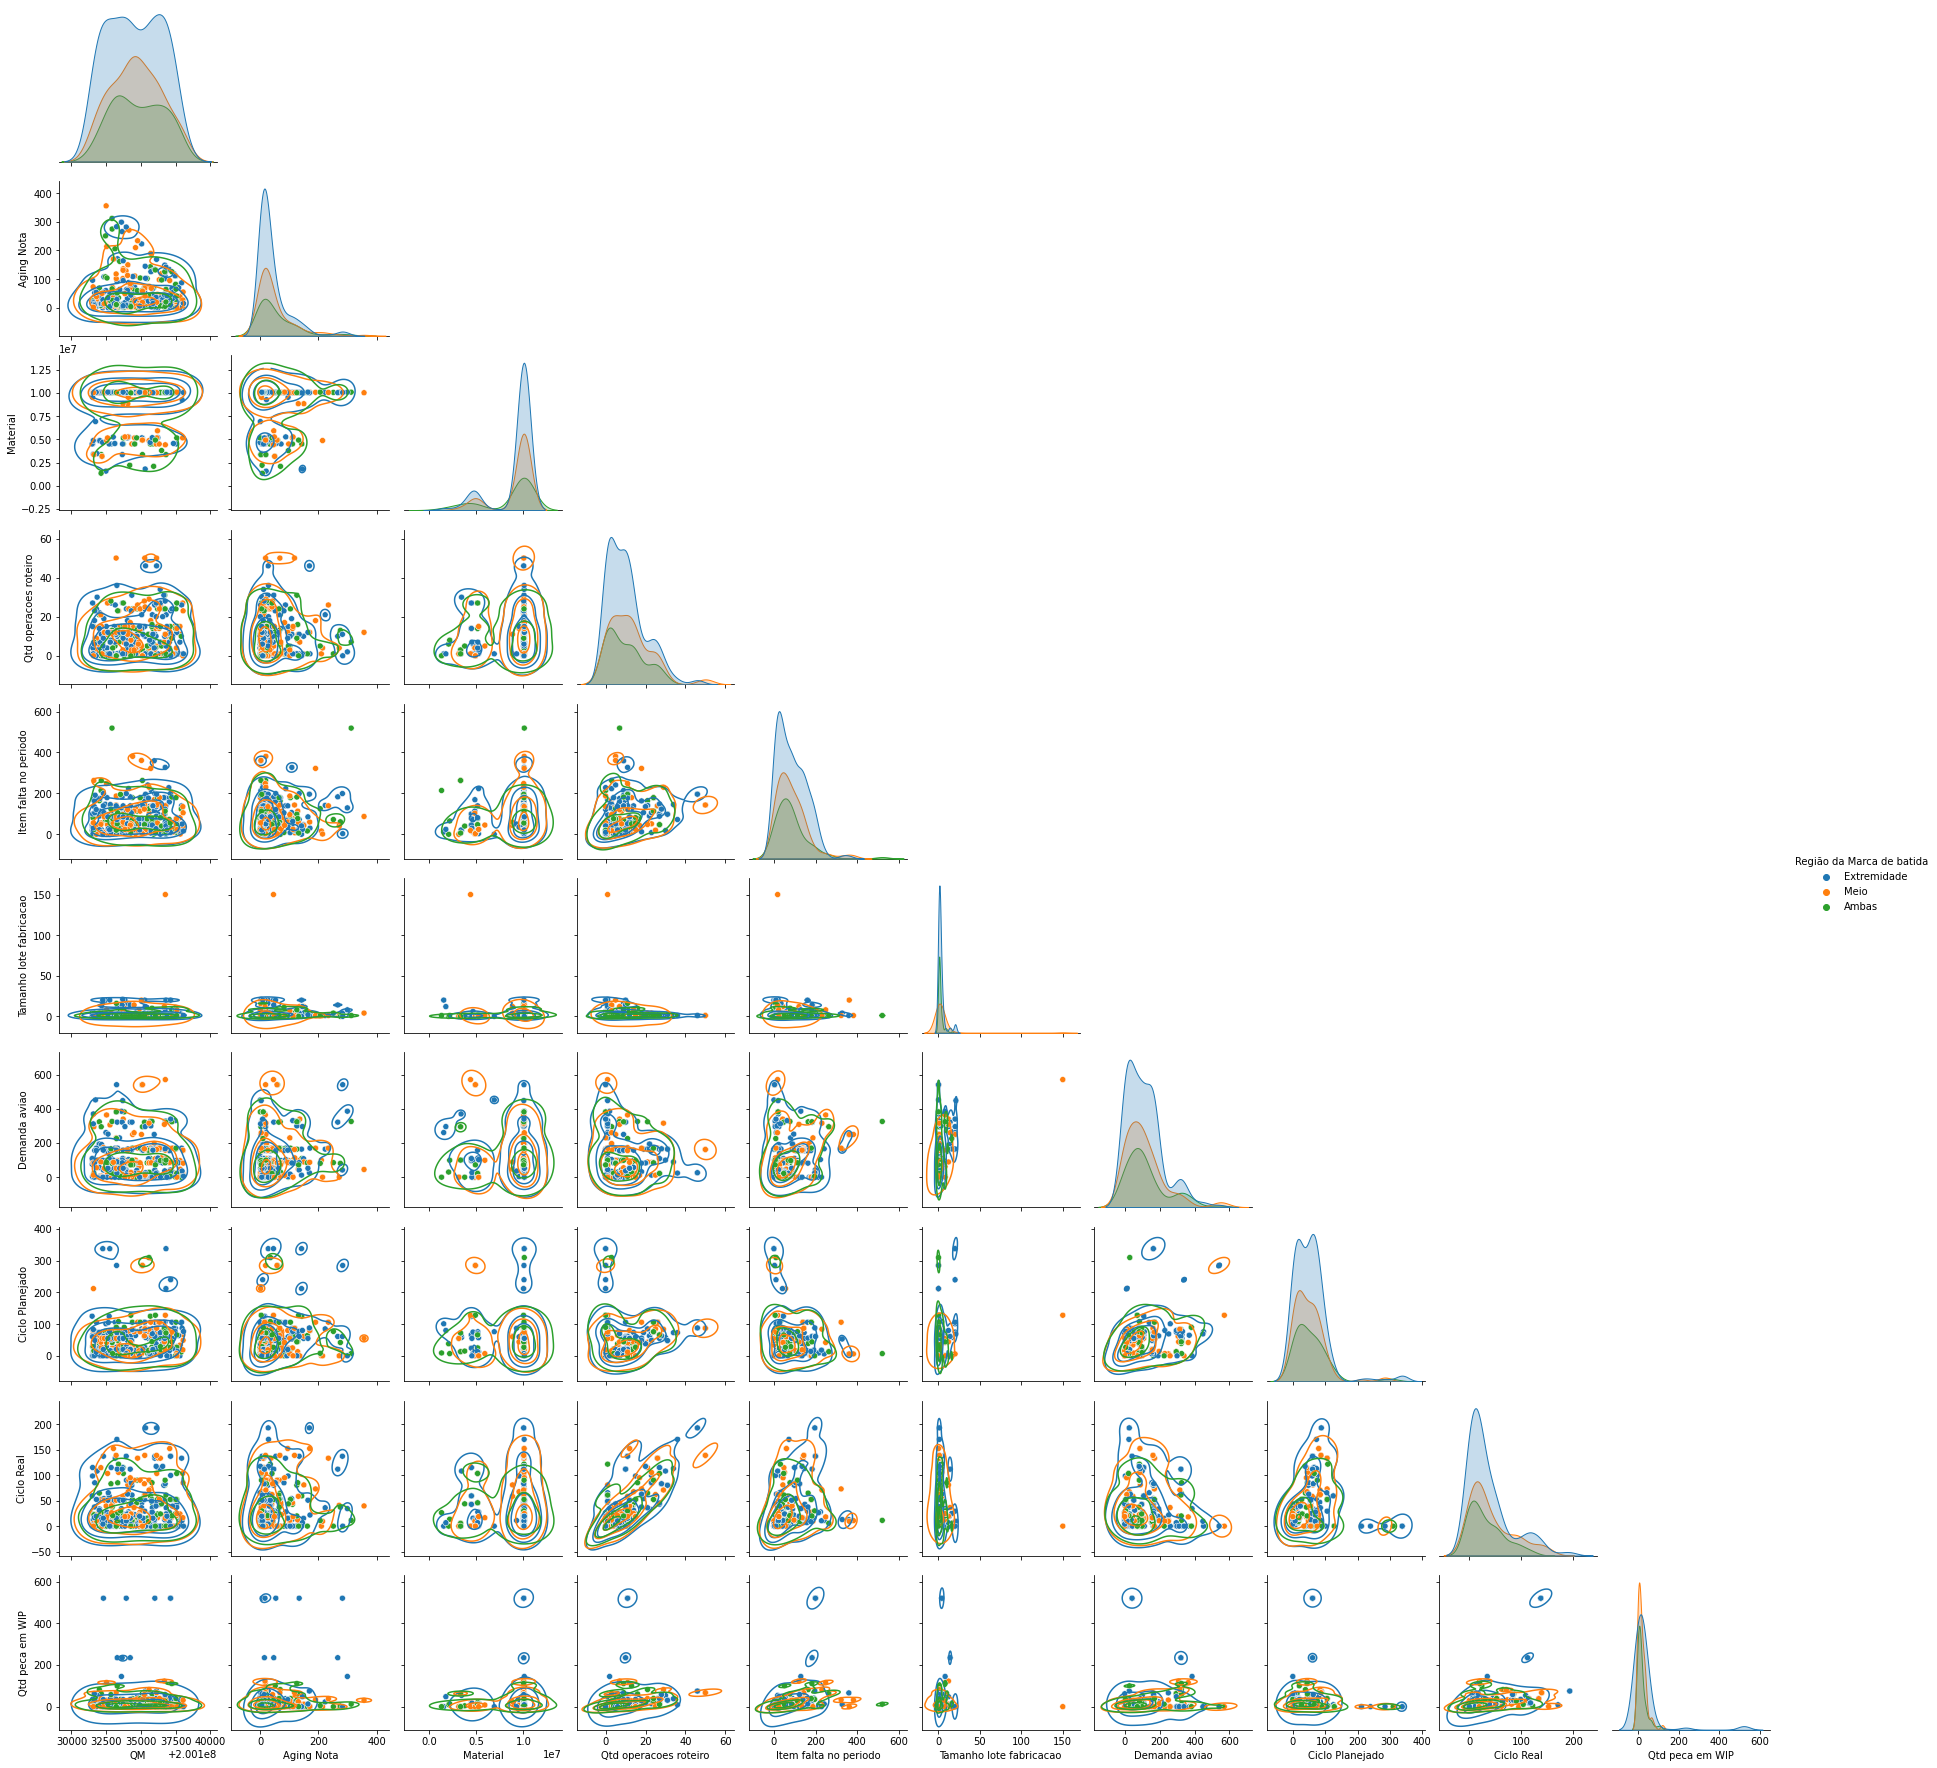

In [16]:
g = sns.pairplot(df.drop('Tempo estoque', axis=1), diag_kind="kde", hue='Região da Marca de batida', corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [17]:
df.corr()

,QM,Aging Nota,Material,Qtd operacoes roteiro,Tempo estoque,Item falta no periodo,Tamanho lote fabricacao,Demanda aviao,Ciclo Planejado,Ciclo Real,Qtd peca em WIP
QM,1.000000,-0.013817,0.083870,0.086118,NaN,0.023317,0.047820,-0.015158,0.080943,0.050622,0.027458
Aging Nota,-0.013817,1.000000,0.047371,-0.044731,NaN,0.083786,0.043532,0.130054,0.141863,0.084606,0.138604
Material,0.083870,0.047371,1.000000,0.080822,NaN,0.095513,-0.055751,-0.038095,-0.042136,0.037931,0.085452
Qtd operacoes roteiro,0.086118,-0.044731,0.080822,1.000000,NaN,0.313556,-0.126287,-0.107406,0.018146,0.748320,0.163692
Tempo estoque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item falta no periodo,0.023317,0.083786,0.095513,0.313556,NaN,1.000000,-0.062885,0.147415,-0.157081,0.273295,0.364504
Tamanho lote fabricacao,0.047820,0.043532,-0.055751,-0.126287,NaN,-0.062885,1.000000,0.312828,0.160252,-0.075750,0.039309
Demanda aviao,-0.015158,0.130054,-0.038095,-0.107406,NaN,0.147415,0.312828,1.000000,0.387206,-0.089078,0.048730
Ciclo Planejado,0.080943,0.141863,-0.042136,0.018146,NaN,-0.157081,0.160252,0.387206,1.000000,0.116898,0.001314
Ciclo Real,0.050622,0.084606,0.037931,0.748320,NaN,0.273295,-0.075750,-0.089078,0.116898,1.000000,0.426142


<Axes: >

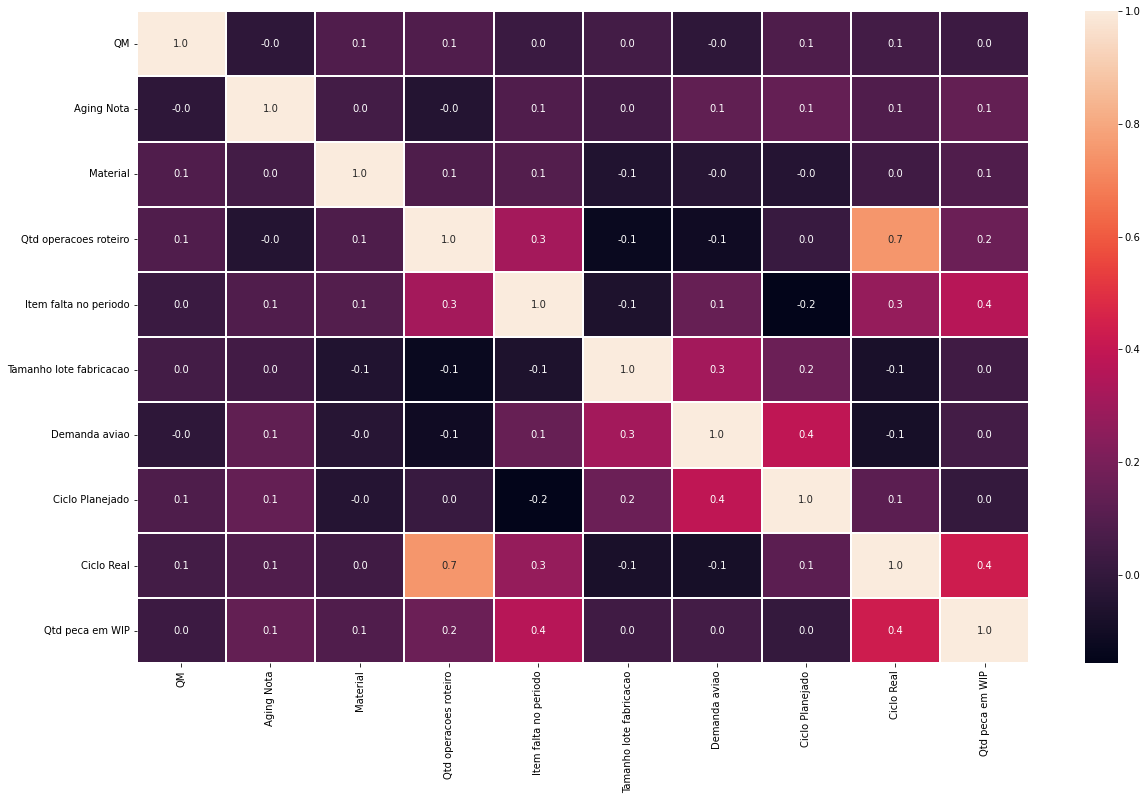

In [18]:
drop = df.drop('Tempo estoque', axis=1)
correlation = drop.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.1)
plt.gcf().set_size_inches(20, 12)
plot

In [19]:
!pip install scipy
from scipy.cluster._hierarchy import dendogram, linkage
dendogram(linkage(x))
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

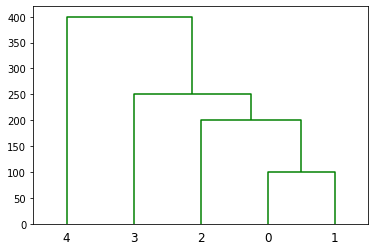

In [20]:
# Create an array
x = np.array([100., 200., 300., 400., 500., 250.,
              450., 280., 450., 750.])
  
# Plot the hierarchical clustering as a dendrogram.
temp = hierarchy.linkage(x, 'single')
plt.figure()
  
dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=.7)

TypeError: ignored

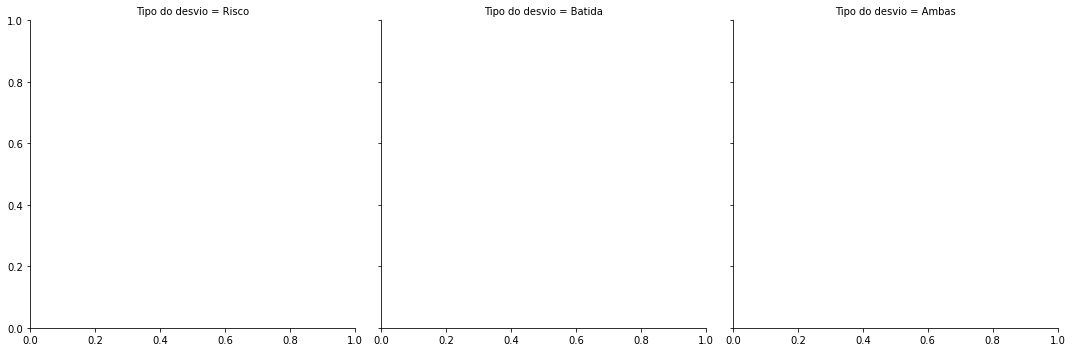

In [21]:
sns.lmplot(x='Data de abertura', y='Tamanho da peça', data=df, hue='Tipo do desvio' , col='Tipo do desvio')